In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed

In [27]:
name = 'network_02'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'

In [28]:
train = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_02/tracks_02_train.csv')
val = pd.read_csv('/home/ADF/ajl573/Data/interstellar_data/tracks_02/tracks_02_val.csv')

In [29]:
print(f'Length of training data = {len(train)}')
print(f'Length of validation data = {len(val)}')

Length of training data = 5163732
Length of validation data = 1290932


In [30]:
n_batches = np.arange(500, 2000)  # Select a range where number of batches is reasonable
r = len(train) % n_batches 

# Print whole multiples of training size
print(f'choose number of batches from:\n{n_batches[r==0]}')

choose number of batches from:
[ 558  651  661  868 1116 1302 1322 1953 1983]


In [31]:
network = DenseNetwork.from_config(f'{save_path}/{name}_config.json')
network.load_model()
network.load_history()
network.model.summary()

## Continue training

Continue to train the model if required.

In [35]:
network.train(train, x_cols, y_cols, epochs=5000, validation_split=None, validation_data=val,
              callbacks=['checkpoint', 'tensorboard'])

Plot the loss.

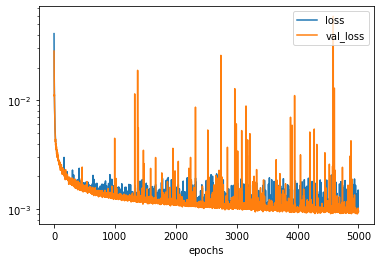

In [45]:
ax = network.history.plot(x='epochs', y=['loss', 'val_loss'])
ax.set_yscale('log')
ax.legend(loc='upper right');

Here we see there is still more training possible, but there is a lot more noise, maybe increase the batch size and drop the learning rate to cope with the change.

In [ ]:
network.save()

## Best model

Load checkpointed best model, note that it replaces the current model in the network so take care when saving.

In [50]:
network.load_model(suffix='best_model')

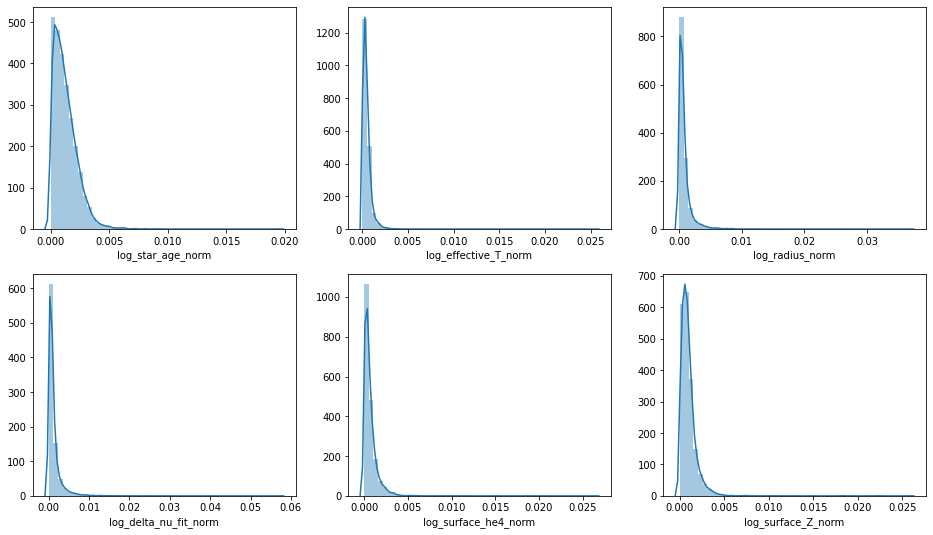

In [51]:
network.plot_metric(val.sample(10000));

In [52]:
network.scores(val.sample(10000))

,log_star_age_norm,log_effective_T_norm,log_radius_norm,log_delta_nu_fit_norm,log_surface_he4_norm,log_surface_Z_norm
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.262659e-03,4.729350e-04,8.400288e-04,1.212993e-03,6.763899e-04,9.776476e-04
std,9.905757e-04,5.594119e-04,1.386274e-03,2.088480e-03,8.700047e-04,9.400795e-04
min,1.986034e-07,1.210806e-07,5.223437e-08,1.604559e-07,1.924911e-07,4.228310e-07
25%,5.064599e-04,1.802715e-04,2.308365e-04,3.152916e-04,2.008517e-04,4.153413e-04
50%,1.062553e-03,3.649837e-04,5.063251e-04,7.006883e-04,4.487283e-04,7.890811e-04
75%,1.778712e-03,6.304553e-04,9.522058e-04,1.330478e-03,8.641070e-04,1.274266e-03
max,1.031842e-02,3.304113e-02,7.222110e-02,1.113878e-01,2.390432e-02,2.218592e-02
